# MNIST Dataset

Sample Images


In [1]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
root='/content/drive/My Drive/Colab Notebooks/Data/MNIST'

In [5]:
train = datasets.MNIST(root,train=True,download=True,transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST(root,train=False,download=True,transform = transforms.Compose([transforms.ToTensor()]))

Extracting /content/drive/My Drive/Colab Notebooks/Data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/My Drive/Colab Notebooks/Data/MNIST/MNIST/raw


Extracting /content/drive/My Drive/Colab Notebooks/Data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/My Drive/Colab Notebooks/Data/MNIST/MNIST/raw


Extracting /content/drive/My Drive/Colab Notebooks/Data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/My Drive/Colab Notebooks/Data/MNIST/MNIST/raw


Extracting /content/drive/My Drive/Colab Notebooks/Data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/My Drive/Colab Notebooks/Data/MNIST/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [20]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=False)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=False)

In [28]:
def get_images(trainset):
  imgs = []
  label = 0
  for Xs,ys in trainset:
    for i in range(0,len(ys)):
      if ys[i]==label:
        imgs.append(Xs[i])
        label+=1
      elif label==10:
        break
    if label==10:
      break
  return imgs

def show_images(imgs):
  plt.figure()
  plt.figure(figsize=(15,2))
  for i in range(0,len(imgs)):
    ax = plt.subplot(1,len(imgs),i+1)
    plt.imshow(imgs[i].view(28,28))

    # remove axis
    plt.xticks([])
    plt.yticks([])

    # remove black frames
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

  plt.subplots_adjust(wspace=0.1, hspace=0.2)
  plt.show()

<Figure size 432x288 with 0 Axes>

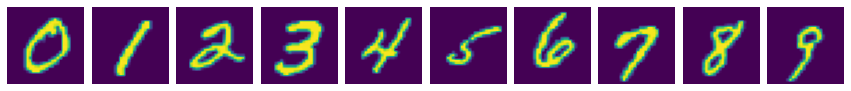

In [29]:
# order 0,1,2,3,4,5,6,7,8,9
imgs = get_images(trainset)
show_images(imgs)